In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns
from Config import cons_key, cons_sec, acc_tkn, acc_tkn_sec

# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [5]:
consumer_key = cons_key
consumer_secret = cons_sec
access_token = acc_tkn
access_token_secret = acc_tkn_sec

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [6]:
twt_ids = ('@BBCNews', '@CBSNews', '@CNN', '@FoxNews', '@nytimes')

sentiment = []
counter = 1

for account in twt_ids:
    
    for i in range(5):
        public_tweets = api.user_timeline(account)
        
        for tweet in public_tweets:
            
            #print('Tweet %s: %s' % (counter, tweet['text']))
            
            compound = analyzer.polarity_scores(tweet['text'])['compound']
            pos = analyzer.polarity_scores(tweet['text'])['pos']
            neu = analyzer.polarity_scores(tweet['text'])['neu']
            neg = analyzer.polarity_scores(tweet['text'])['neg']
            tweets_ago = counter
        
            sentiment.append({'Account': account, 'Date': tweet['created_at'], 
                               'Compound': compound,
                               'Positive': pos,
                               'Negative': neu,
                               'Neutral': neg,
                               'Tweets Ago': counter})
        
            counter = counter + 1

In [3]:
#print(sentiment)

In [8]:
sentiment_df = pd.DataFrame.from_dict(sentiment)
sentiment_df.head()

,Account,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,@BBCNews,-0.5574,Tue Apr 10 01:54:42 +0000 2018,0.660,0.340,0.000,1
1,@BBCNews,-0.4215,Tue Apr 10 01:54:42 +0000 2018,0.781,0.219,0.000,2
2,@BBCNews,-0.3400,Tue Apr 10 01:04:39 +0000 2018,0.769,0.231,0.000,3
3,@BBCNews,0.0000,Tue Apr 10 00:55:45 +0000 2018,1.000,0.000,0.000,4
4,@BBCNews,0.0772,Mon Apr 09 23:53:09 +0000 2018,0.843,0.000,0.157,5


In [10]:
sentiment_df.to_csv('news_outlet_sentiment.csv')

In [18]:
nytimes_df = sentiment_df.loc[range(400,500),['Account', 'Compound']]
nytimes_df.head()

,Account,Compound
400,@nytimes,-0.5859
401,@nytimes,0.0000
402,@nytimes,0.0000
403,@nytimes,-0.7964
404,@nytimes,-0.5423


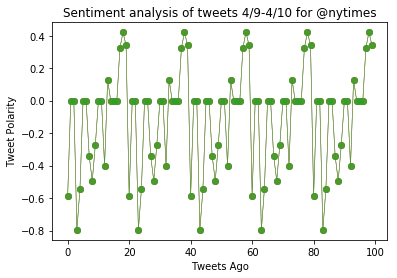

In [22]:
plt.plot(np.arange(len(nytimes_df['Compound'])),nytimes_df['Compound'], marker='o', linewidth=0.5, alpha= 0.8)

plt.title(f'Sentiment analysis of tweets 4/9-4/10 for @nytimes')
plt.ylabel('Tweet Polarity')
plt.xlabel('Tweets Ago')
plt.show()

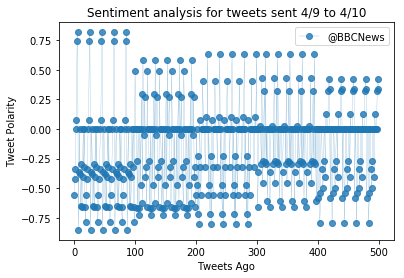

In [36]:
plt.plot(np.arange(len(sentiment_df['Compound'])), sentiment_df['Compound'], marker='o', linewidth=0.2, alpha= 0.8)
plt.title(f'Sentiment analysis for tweets sent 4/9 to 4/10')
plt.ylabel('Tweet Polarity')
plt.xlabel('Tweets Ago')
plt.legend(sentiment_df['Account'].unique())
plt.show()

In [33]:
sentiment_df['Account'].unique()

array(['@BBCNews', '@CBSNews', '@CNN', '@FoxNews', '@nytimes'], dtype=object)